In [31]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import os
from nltk.probability import FreqDist

from nltk.classify import NaiveBayesClassifier, DecisionTreeClassifier,accuracy
from sklearn.pipeline import Pipeline

In [32]:
#Setting Up Stuff
stop_words = stopwords.words("english")
print(stop_words)
punc = punctuation
print(punc)

stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
f = open("terminology.txt","r")
t_list = f.readline().strip("")
#Pre Processing Function
def pre_process_sentencez(sentence):
    tokens = word_tokenize(sentence)
    new_list = []
    for token in tokens:
        token = token.lower()
        if token not in stop_words and token not in punc and token.isalpha():
            new_list.append(stemmer.stem(token))
    return new_list
def get_tag(tag):
    tag = tag.lower()
    if tag.startswith('j'):
        return wordnet.ADJ
    elif tag.startswith('v'):
        return wordnet.VERB
    elif tag.startswith('n'):
        return wordnet.NOUN
    elif tag.startswith('r'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#Lematizing Function
def sentence_lemmatizer(sentence):
    lemmatized_sentence = []
    tagged = pos_tag(sentence)
    for (token,tag) in tagged:
        lemma = lemmatizer.lemmatize(token,get_tag(tag.lower()))
        lemmatized_sentence.append(lemma)
    return lemmatized_sentence
t_list = pre_process_sentencez(t_list)
t_list = sentence_lemmatizer(t_list)
print(t_list)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [33]:
def pre_process_sentence(sentence):
    tokens = word_tokenize(sentence)
    new_list = []
    for token in tokens:
        token = token.lower()
        if token not in stop_words and token not in punc and token.isalpha():
            new_list.append(stemmer.stem(token))
    return new_list

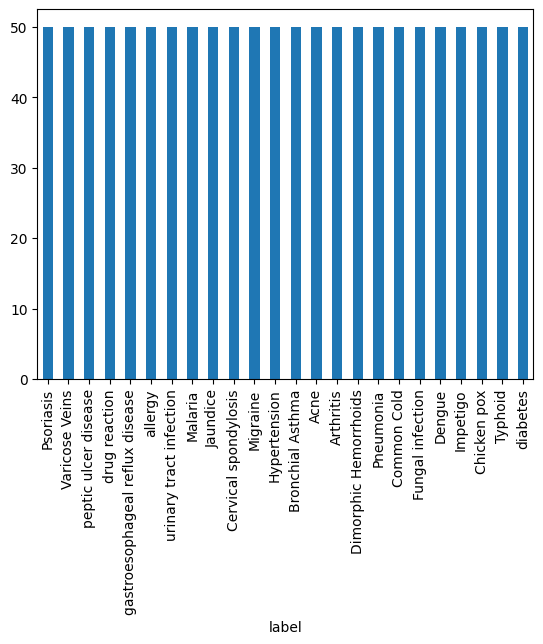

   Unnamed: 0      label                                               text
0           0  Psoriasis  I have been experiencing a skin rash on my arm...
1           1  Psoriasis  My skin has been peeling, especially on my kne...
2           2  Psoriasis  I have been experiencing joint pain in my fing...
3           3  Psoriasis  There is a silver like dusting on my skin, esp...
4           4  Psoriasis  My nails have small dents or pits in them, and...
['Psoriasis' 'Varicose Veins' 'Typhoid' 'Chicken pox' 'Impetigo' 'Dengue'
 'Fungal infection' 'Common Cold' 'Pneumonia' 'Dimorphic Hemorrhoids'
 'Arthritis' 'Acne' 'Bronchial Asthma' 'Hypertension' 'Migraine'
 'Cervical spondylosis' 'Jaundice' 'Malaria' 'urinary tract infection'
 'allergy' 'gastroesophageal reflux disease' 'drug reaction'
 'peptic ulcer disease' 'diabetes']
1200
0       Psoriasis
1       Psoriasis
2       Psoriasis
3       Psoriasis
4       Psoriasis
          ...    
1195     diabetes
1196     diabetes
1197     diabetes


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the Data
df = pd.read_csv("Symptom2Disease.csv")
df.dropna(inplace=True)
disease_counts =  df["label"].value_counts()

disease_counts.plot(kind="bar")
plt.show()


# List of top 20 common diseases
top_20_diseases = [
    "Acne", "Arthritis", "Bronchial Asthma", "Chicken pox", "Common Cold", 
    "Dengue", "Fungal infection", "Hypertension", "Impetigo", "Jaundice", 
    "Malaria", "Migraine", "Pneumonia", 
    "Varicose Veins", "diabetes", 
    "gastroesophageal reflux disease"
]


# Filter rows that match the top 20 diseases
filtered_df = df

# Show filtered data
print(filtered_df.head(5))
print(filtered_df["label"].unique())
X = filtered_df["text"]
Y = filtered_df["label"]
print(len(X))
print(Y)

In [35]:
word_count = 0
def check_terminology(sentence):
    global word_count
    final_list = []
    for token in sentence:
        if token in t_list:
            final_list.append(token)
    if len(final_list) == 0:
        word_count+=1
    return final_list
#Process The Data
data_set = []
for x in X:
    sentence = pre_process_sentence(x)
    sentence2 = sentence_lemmatizer(sentence)
    data_set.append(sentence2)
print(f"word count: {word_count}")
print(data_set)

word_list = []
for data in data_set:
    for word in data:
        word_list.append(word)
print(f"word: {word_list}")

distribution = FreqDist(word_list)
print(distribution.most_common(2000))


top_terminology = []
pre_t_list = []
lema_t_list = []

pre_t_list = pre_process_sentence(" ".join(t_list))
lema_t_list = sentence_lemmatizer(pre_t_list)



print(f"Terminology List: {lema_t_list}")


for (top_word, count) in distribution.most_common(2000):
    if top_word in lema_t_list:
        top_terminology.append((top_word, count))

top_terminology = top_terminology[:20]
print(top_word)
print(f"Top Terminology: {top_terminology}")
print(f"Len: {len(top_terminology)}")

counter_set = {}
for (idx, data) in enumerate(data_set):
    if len(data) == 0:
        label = Y[idx]
        counter_set[label] = counter_set.get(label, 0) + 1

        
print(counter_set)

tops = FreqDist(word_list)

top_words = []
for word in tops.most_common(20):
    top_words.append(word[0])

def generate_feature(sentence):
    feature = {}
    for word in top_words:
        if word in sentence:
            feature[word] = True
        else:
            feature[word] = False
    return feature

feature_set = []

print("Data: ",data_set[0])
for (data,lbl) in zip(data_set, Y):
    feature = generate_feature(data)
    tup = (feature, lbl)
    feature_set.append(tup)

train_len = int(len(feature_set)*0.7)
print("feat: ",feature_set)
train = feature_set[:train_len]
test = feature_set[train_len:]
print(train[0])
print(train[100])
print(len(train))
print(len(test))

model = DecisionTreeClassifier.train(train)
acc = accuracy(model, test)
print("Acc: ",acc)




    

word count: 0
[['experienc', 'skin', 'rash', 'arm', 'leg', 'torso', 'past', 'week', 'red', 'itchi', 'cover', 'dri', 'scali', 'patch'], ['skin', 'peel', 'especi', 'knee', 'elbow', 'scalp', 'peel', 'often', 'accompani', 'burn', 'sting', 'sensat'], ['experienc', 'joint', 'pain', 'finger', 'wrist', 'knee', 'pain', 'often', 'achi', 'throb', 'get', 'wors', 'move', 'joint'], ['silver', 'like', 'dust', 'skin', 'especi', 'lower', 'back', 'scalp', 'dust', 'make', 'small', 'scale', 'flake', 'easili', 'scratch'], ['nail', 'small', 'dent', 'pit', 'often', 'feel', 'inflammatori', 'tender', 'touch', 'even', 'minor', 'rash', 'arm'], ['skin', 'palm', 'sole', 'thicken', 'deep', 'crack', 'crack', 'pain', 'bleed', 'easili'], ['skin', 'around', 'mouth', 'nose', 'eye', 'red', 'inflam', 'often', 'itchi', 'uncomfort', 'notic', 'inflamm', 'nail'], ['skin', 'sensit', 'react', 'easili', 'chang', 'temperatur', 'humid', 'often', 'care', 'product', 'use', 'skin'], ['notic', 'sudden', 'peel', 'skin', 'differ', 'part

In [36]:
import re
import pandas as pd
import numpy as np
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

df = pd.read_csv("mayo_diseases_full.csv")
stop_words = set(stopwords.words("english"))
stemmer    = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text: str) -> list[str]:
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    return [stemmer.stem(lemmatizer.lemmatize(t)) for t in tokens]

symptom_tokens = df["symptoms"].dropna().apply(preprocess).tolist()

extended_data_set = data_set + symptom_tokens

w2v_model = Word2Vec(
    sentences=extended_data_set,
    vector_size=1000,
    window=8,
    min_count=2,
    workers=16,
    sg=1,
    epochs=10,
    seed=42
)

def sentence_vector(tokens, model):
    vec = np.zeros(model.vector_size)
    count = 0
    for token in tokens:
        if token in model.wv:
            vec += model.wv[token]
            count += 1
    if count > 0:
        vec /= count
    return vec

word2vec_features = np.array([
    sentence_vector(tokens, w2v_model) for tokens in extended_data_set
])
print("Extended Word2Vec features shape:", word2vec_features.shape)


Extended Word2Vec features shape: (2034, 1000)


In [37]:
def random_feature_dropout(vec, drop_fraction=0.4, seed=None):
    if seed is not None:
        np.random.seed(seed)
    mask = np.random.rand(vec.size) > drop_fraction
    return vec * mask

word2vec_features = np.array([
    random_feature_dropout(sentence_vector(tokens, w2v_model), drop_fraction=0.4)
    for tokens in extended_data_set
])


In [38]:
X_main = word2vec_features[:len(Y)]        # take only your original 800
X_train, X_test, y_train, y_test = train_test_split(
    X_main, Y, test_size=0.3, random_state=42
)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        13
                      Arthritis       1.00      1.00      1.00        14
               Bronchial Asthma       0.88      1.00      0.94        15
           Cervical spondylosis       1.00      1.00      1.00        14
                    Chicken pox       0.75      0.75      0.75        12
                    Common Cold       1.00      0.88      0.94        17
                         Dengue       0.93      0.72      0.81        18
          Dimorphic Hemorrhoids       1.00      1.00      1.00        13
               Fungal infection       1.00      1.00      1.00        17
                   Hypertension       1.00      1.00      1.00        15
                       Impetigo       0.94      1.00      0.97        17
                       Jaundice       1.00      1.00      1.00        18
                        Mal

In [39]:
import pickle

# After your training and fitting code:
model_bundle = {
    "w2v_model": w2v_model,  # your trained Word2Vec model
    "clf": clf               # your trained GaussianNB model
}

with open('full_pipeline_naive.pkl', 'wb') as model_file:
    pickle.dump(model_bundle, model_file)

print("Model successfully saved as 'full_pipeline.pkl'")


Model successfully saved as 'full_pipeline.pkl'


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_main = word2vec_features[:len(Y)]        # take only your original 800
X_train, X_test, y_train, y_test = train_test_split(
    X_main, Y, test_size=0.3, random_state=42
)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      0.92      0.96        13
                      Arthritis       0.82      1.00      0.90        14
               Bronchial Asthma       0.81      0.87      0.84        15
           Cervical spondylosis       0.93      1.00      0.97        14
                    Chicken pox       0.47      0.58      0.52        12
                    Common Cold       0.87      0.76      0.81        17
                         Dengue       1.00      0.22      0.36        18
          Dimorphic Hemorrhoids       1.00      1.00      1.00        13
               Fungal infection       0.94      0.94      0.94        17
                   Hypertension       0.94      1.00      0.97        15
                       Impetigo       0.89      0.94      0.91        17
                       Jaundice       1.00      1.00      1.00        18
                        Mal

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_main = word2vec_features[:len(Y)]
X_train, X_test, y_train, y_test = train_test_split(
    X_main, Y, test_size=0.3, random_state=42
)

clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        13
                      Arthritis       0.88      1.00      0.93        14
               Bronchial Asthma       0.88      1.00      0.94        15
           Cervical spondylosis       1.00      1.00      1.00        14
                    Chicken pox       0.62      0.67      0.64        12
                    Common Cold       1.00      0.88      0.94        17
                         Dengue       0.82      0.50      0.62        18
          Dimorphic Hemorrhoids       1.00      1.00      1.00        13
               Fungal infection       1.00      0.94      0.97        17
                   Hypertension       0.83      1.00      0.91        15
                       Impetigo       0.89      1.00      0.94        17
                       Jaundice       1.00      1.00      1.00        18
                        Mal

In [42]:
import pickle
model_bundle = {
    "w2v_model": w2v_model,
    "clf":       clf
}

with open('full_pipeline.pkl', 'wb') as model_file:
    pickle.dump(model_bundle, model_file)

print("Model successfully saved as 'random_forest_model.pkl'")


Model successfully saved as 'random_forest_model.pkl'


In [43]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

# print("Cross-Validation Accuracy Scores:", scores)
# print("Average Accuracy: {:.2f}%".format(np.mean(scores) * 100))

In [44]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

clf = XGBClassifier(n_estimators=80, learning_rate=0.15, max_depth=4, random_state=42)
clf.fit(X_train, y_train_encoded)

y_pred_encoded = clf.predict(X_test)
y_pred = encoder.inverse_transform(y_pred_encoded)

print(classification_report(y_test, y_pred))

with open("xgb_model.pkl", "wb") as model_file:
    pickle.dump((clf, encoder), model_file)

print("Model saved successfully!")


                                 precision    recall  f1-score   support

                           Acne       1.00      0.92      0.96        13
                      Arthritis       0.88      1.00      0.93        14
               Bronchial Asthma       0.88      1.00      0.94        15
           Cervical spondylosis       1.00      1.00      1.00        14
                    Chicken pox       0.58      0.58      0.58        12
                    Common Cold       0.93      0.82      0.87        17
                         Dengue       0.64      0.39      0.48        18
          Dimorphic Hemorrhoids       1.00      0.92      0.96        13
               Fungal infection       0.93      0.82      0.87        17
                   Hypertension       0.88      1.00      0.94        15
                       Impetigo       0.79      0.88      0.83        17
                       Jaundice       0.95      1.00      0.97        18
                        Malaria       0.88      1.

In [45]:
def load_model(model_path):
    try:
        with open(model_path, 'rb') as model_file:
            model = pickle.load(model_file)
        print(f"Model successfully loaded from '{model_path}'")
        print(f"Loaded Model Type: {type(model)}")
        print(model)
        if isinstance(model, tuple):
            model,label_encoder = model 
            return model, label_encoder
        else: 
            return model
    except FileNotFoundError:
        print(f"Error: File '{model_path}' not found.")
    except Exception as e:
        print(f"Error loading model: {e}")
def menu():
    model = load_model("random_forest_model.pkl")
    if model is None:
        return  
    
    while True:
        choice = input("Enter your choice: ")
        
        if choice == "1":
            user_input = input("Enter symptom description: ")
            sentence = pre_process_sentence(user_input)
            sentence2 = sentence_lemmatizer(sentence)
            
            
            word2vec_features = np.array([sentence_vector(sentence2, w2v_model)])
            predicted_proba = model.predict_proba(word2vec_features)[0]
            
            top_3_indices = np.argsort(predicted_proba)[-3:][::-1]  
            top_3_confidences = predicted_proba[top_3_indices]      

            top_3_predictions = model.classes_[top_3_indices]
            
            print(f"Top 3 Possible Diseases for '{user_input}':")
            for i in range(3):
                print(f"{i+1}. {top_3_predictions[i]} with Confidence: {top_3_confidences[i]:.2f}", flush=True)
        
        elif choice == "2":
            print("Exiting...")
            break
        
        else:
            print("Invalid choice. Please select 1 or 2.")
menu()


Model successfully loaded from 'random_forest_model.pkl'
Loaded Model Type: <class 'dict'>
{'w2v_model': <gensim.models.word2vec.Word2Vec object at 0x000002829E46C220>, 'clf': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)}
Invalid choice. Please select 1 or 2.
Invalid choice. Please 

KeyboardInterrupt: Interrupted by user